#  Algoritmo Aprendizagem Automática
## Projeto nº 4
### Introdução à Inteligência Artificial edição 2020/21


## Grupo: 22

### Elementos do Grupo

Nome: André Firmino

Número: 44999

Nome: Joao Janeiro

Número: 52779

Nome: Nuno Estalagem

Número 52828

### Imports
Para realizar o projeto foi necessário importar os módulos abaixo:

In [6]:
from utilsAA import *
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.model_selection import train_test_split, cross_val_score

### Etapa 1-Load de Dados
Nesta etapa vamos fazer load aos dados do ficheiro "airplane.csv", os quais iremos utilizar 

In [7]:
data,target,feature_names,target_names=load_data('airline.csv')


### Etapa 2-processar os dados

Nesta etapa retira-se da lista de dados o atributo id, o qual não é útil para as previsões. Para além disso, utilizam-se as funções "encode" e "one_hot_encode_feature" para converter atributos categóricos em atributos numéricos. De realçar que a função "one_hot_encode_feature" é apenas utilizado para converter atributos com mais de duas caracteristicas

### Gravar previsões

In [8]:
feature_names = feature_names[1:]
data = data[:,1:]
data[:,0]=encode_feature(data[:,0])
data[:,1]=encode_feature(data[:,1])
data[:,3]=encode_feature(data[:,3])
data, feature_names = one_hot_encode_feature(data, 4, feature_names)


### Etapa 3: procura do melhor modelo

Iremos agora averiguar qual o melhor algoritmo entre o "DecisionTreeClassifier" e o "KNeighborsClassifier". 
    
Antes disso, contudo, vamos tentar obter a melhor combinação de valores para cada um dos algoritmos. Deste modo, criamos duas funções: best_splitter_dec_tree e best_splitter_neighbors. Enquanto que a best_spliteer_dec_tree verifica quais os melhores valores até 20 (isto porque a partir  desse valor os resultados serão mais constantes pois o modelo será demasiado simples) do min_sample_split e 12 no max_depth, que é o depth maximo da árvore(isto porque o grupo constatou que estes eram os atributos da decision tree que obtinham melhores valores em accuracy), o best_splitter_neighbors verifica qual o melhor valor para número de vizinhos até 30 vizinhos(o grupo realizou KNeighbors até 80 vizinhos e 30 era sempre o melhor valor obtido).   

Agora que temos os valores pretendidos para min_samples , max depth e neighbors vamos executar o cross values com CV=10 de uma decision tree e de um kneighbors com os valores obtidos e verificar a accuracy em média


In [9]:
def best_splitter_dec_tree():
    max_maior=0
    value=0
    value2=0
    for x in range(21):
        for y in range(13):
            dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=x, max_depth=y)
            scores = cross_val_score(dtc,
                             X=data,
                             y=target,
                             cv=10,
                             n_jobs=-1
                            )
            if np.mean(scores)>max_maior:
                max_maior=np.mean(scores)
                value=x
                value2=y
    print("A maior percentagem eh " + str(max_maior)+ " e utilizamos valor: " + str(value) + " " +str(value2));
    return(value,value2)

valores=best_splitter_dec_tree()
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=valores[0],max_depth=valores[1])
scores = cross_val_score(dtc,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



def best_splitter_neighbors():
    max_maior=0
    neighbors=0
    for x in range(31):
        dtc = KNeighborsClassifier(n_neighbors=x)
        scores = cross_val_score(dtc,
                             X=data,
                             y=target,
                             cv=10,
                             n_jobs=-1
                            )
        if np.mean(scores)>max_maior:
            max_maior=np.mean(scores)
            neighbors=x
    print("A maior percentagem eh " + str(max_maior)+ " e utilizamos valor: " +str(neighbors));
    return neighbors
neighbors=best_splitter_neighbors()
ctc =  KNeighborsClassifier(n_neighbors=neighbors)
scores = cross_val_score(ctc,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))




A maior percentagem eh 0.9061771561771561 e utilizamos valor: 13 6
CV accuracy:
	0.8205128205128205
	0.9487179487179487
	0.9102564102564102
	0.9230769230769231
	0.9102564102564102
	0.9230769230769231
	0.9102564102564102
	0.8717948717948718
	0.8571428571428571
	0.948051948051948
Average CV accuracy: 0.902 +/- 0.039
A maior percentagem eh 0.6774225774225775 e utilizamos valor: 30
CV accuracy:
	0.6538461538461539
	0.6282051282051282
	0.6666666666666666
	0.7051282051282052
	0.6794871794871795
	0.7564102564102564
	0.6282051282051282
	0.6666666666666666
	0.6753246753246753
	0.7142857142857143
Average CV accuracy: 0.677 +/- 0.037


O código abaixo imprime quatro gráficos. Os primeiros três realizam a comparação do train set com o test set de uma decision tree com dados "data" e parâmetros min_samples_split,max_depth e min samples_leaf, respetivamente. O último gráfico representa o valor de accuracy da aplicação de Cross_val_score a um algorítmo Kneighbors com x vizinhos. 

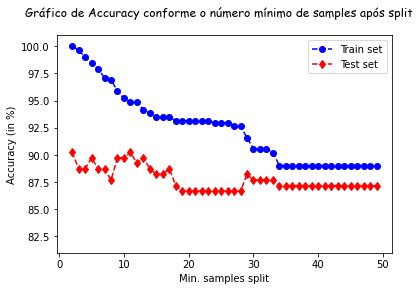

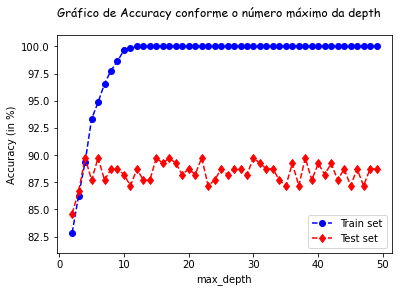

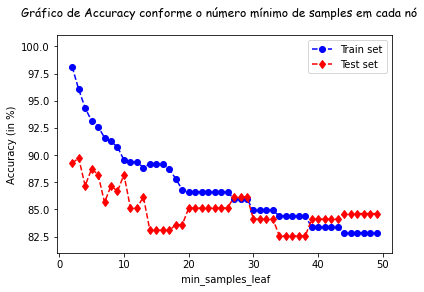

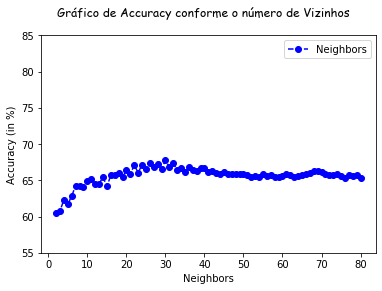

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                  random_state=2)

csfont = {'fontname':'Comic Sans MS'}

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Accuracy conforme o número mínimo de samples após split',**csfont)
plt.show()

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel('max_depth') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Accuracy conforme o número máximo da depth',**csfont)
plt.show()

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel(' min_samples_leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Accuracy conforme o número mínimo de samples em cada nó',**csfont)
plt.show()

graph = []
for i in range(2,81):
    kn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kn,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
    graph.append(np.mean(score)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,81,1) # intervalo do eixo dos xx's
plt.plot(x, graph, 'bo--', label='Neighbors')
plt.ylim(55,85) # limite dos eixo dos yy's
plt.xlabel('Neighbors') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Accuracy conforme o número de Vizinhos',**csfont)
plt.show()


### Etapa 4: procura do melhor modelo

Nesta etapa vamos fazer load aos dados do ficheiro "test.csv", o qual iremos utilizar para testar a accuracy da do algoritmo Decision Tree Classifier

In [15]:
data_test, features_names_test = load_data("test.csv",testdata=True)

De seguida, convertemos os atributos numéricos em binários, tal como na etapa 2, criamos uma árvore de decisão com base nos melhores values obtidos pela funcao best_splitter_dec_tree, utilizamos a função fit, de modo a treinar a árvore( o "treino" apresenta os valores do ficheiro airplane.csv)e  prevemos os resultados que irão ser obtidos no ficheiro test.csv com o método predict sendo esses resultados guardados num ficheiro csv.

In [16]:
features_names_test =  features_names_test[1:]
data_test = data_test[:,1:]
data_test[:,0]=encode_feature(data_test[:,0])
data_test[:,1]=encode_feature(data_test[:,1])
data_test[:,3]=encode_feature(data_test[:,3])
data_test, features_names_test = one_hot_encode_feature(data_test, 4, features_names_test)
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=valores[0],max_depth=valores[1])
dtc.fit(data,target)
var=dtc.predict(data_test)
save_data('IIA2021-proj4-22.csv',var)
